# Clustering of Airbnb Lists

Source of data: http://insideairbnb.com/get-the-data.html

### Load data into Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
listings = pd.read_csv("data/Airbnb_listings_20171002.csv")

In [3]:
listings.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,16570521,Lands' End hideaway,21303289,Eugenia And Alessandro,NaN,Seacliff,37.787331,-122.492117,Private room,120,4,15,2017-09-04,2.02,2,70
1,8001958,Ocean and park front panoramic view,24591867,Raul,NaN,Seacliff,37.780708,-122.509160,Entire home/apt,1850,1,0,NaN,NaN,1,0
2,8388658,Mid-century Seacliff near GG Bridge,9996441,Howard,NaN,Seacliff,37.787664,-122.489152,Entire home/apt,895,3,0,NaN,NaN,1,0
3,16064495,Charming home with views of the Golden Gate Br...,25596860,Teresa,NaN,Seacliff,37.787923,-122.484357,Entire home/apt,975,2,0,NaN,NaN,1,0
4,15664146,Spacious 3 beds in convenient/safe neighborhood,101134145,Ey,NaN,Seacliff,37.784365,-122.489515,Entire home/apt,295,2,40,2017-09-14,3.86,1,123


In [4]:
features = ['neighbourhood','room_type','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','last_review']

In [5]:
lists = listings[features]

In [6]:
lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8933 entries, 0 to 8932
Data columns (total 8 columns):
neighbourhood        8933 non-null object
room_type            8933 non-null object
price                8933 non-null int64
minimum_nights       8933 non-null int64
number_of_reviews    8933 non-null int64
reviews_per_month    7123 non-null float64
availability_365     8933 non-null int64
last_review          7123 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 558.4+ KB


In [7]:
lists.loc['last_review_datetime'] = pd.to_datetime(lists['last_review'])

/Users/Crystal/.msba-notes/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
lists.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8934 entries, 0 to last_review_datetime
Data columns (total 8 columns):
neighbourhood        8933 non-null object
room_type            8933 non-null object
price                8933 non-null object
minimum_nights       8933 non-null object
number_of_reviews    8933 non-null object
reviews_per_month    7123 non-null float64
availability_365     8933 non-null object
last_review          7123 non-null object
dtypes: float64(1), object(7)
memory usage: 628.2+ KB


When "number_of_reviews" is zero, transform the "reviews_per_month" from null to zero.

In [9]:
lists['reviews_per_month'] = np.where(lists['number_of_reviews'] == 0, 0, lists['reviews_per_month'])

/Users/Crystal/.msba-notes/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
lists.head(10)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review
0,Seacliff,Private room,120,4,15,2.02,70,2017-09-04
1,Seacliff,Entire home/apt,1850,1,0,0.00,0,NaN
2,Seacliff,Entire home/apt,895,3,0,0.00,0,NaN
3,Seacliff,Entire home/apt,975,2,0,0.00,0,NaN
4,Seacliff,Entire home/apt,295,2,40,3.86,123,2017-09-14
5,Seacliff,Entire home/apt,159,2,332,6.65,51,2017-09-26
6,Seacliff,Entire home/apt,750,3,7,2.88,162,2017-09-20
7,Seacliff,Entire home/apt,169,6,4,0.83,175,2017-09-17
8,Seacliff,Entire home/apt,170,30,6,0.08,293,2017-08-31
9,Seacliff,Entire home/apt,183,3,142,3.76,323,2017-09-29


### Use apply function

convert availability_365 from the number of days available to the percentage of the whole year that is available

In [11]:
lists['availability_365_perc'] = lists['availability_365'].apply(lambda x: np.round(x/365, 2))

/Users/Crystal/.msba-notes/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
lists.head(5)

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,last_review,availability_365_perc
0,Seacliff,Private room,120,4,15,2.02,70,2017-09-04,0.19
1,Seacliff,Entire home/apt,1850,1,0,0.00,0,NaN,0
2,Seacliff,Entire home/apt,895,3,0,0.00,0,NaN,0
3,Seacliff,Entire home/apt,975,2,0,0.00,0,NaN,0
4,Seacliff,Entire home/apt,295,2,40,3.86,123,2017-09-14,0.34


### Data visualization

In [13]:
import seaborn as sns
sns.set_style("whitegrid")

In [14]:
pricing = listings["price"].values
roomType = listings['room_type'].values

In [15]:
# sns.distplot(pricing)
# sns.countplot(x="price", data=listings, palette="Greens_d")

In [16]:
#PYTEST_VALIDATE_IGNORE_OUTPUT

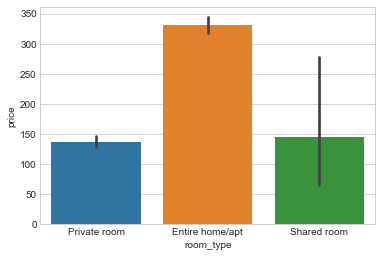

In [17]:
sns.barplot(x="room_type", y="price", data=listings);
# this is how it works to prevent py.test --nbval mark here as an error: https://github.com/computationalmodelling/nbval/issues/6

In [18]:
#ax = sns.barplot(x="neighbourhood", y="availability_365_perc", data=lists)

In [19]:
lists['neighbourhood'] = lists['neighbourhood'].astype('str') 

/Users/Crystal/.msba-notes/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
# listings.groupby('room_type').size().plot(kind = "bar")

In [21]:
#lists.plot.hist(column = "price", bins = 10)

### One-hot encoding

In [22]:
lists[['price','minimum_nights','number_of_reviews','availability_365_perc']] = lists[['price','minimum_nights','number_of_reviews','availability_365_perc']].apply(pd.to_numeric,errors='coerce')

/Users/Crystal/.msba-notes/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
drop_columns = ['number_of_reviews','availability_365','last_review']

In [24]:
clean_lists = lists.drop(drop_columns, axis = 1)

In [25]:
clean_lists.columns

Index(['neighbourhood', 'room_type', 'price', 'minimum_nights',
       'reviews_per_month', 'availability_365_perc'],
      dtype='object')

In [26]:
final_lists = pd.get_dummies(clean_lists)

In [27]:
final_lists = final_lists.dropna()

### Define target variable

In [28]:
final_lists['affordability'] = (final_lists['price'] > 150) 

In [29]:
target = final_lists['affordability'].values
target[:2]

array([False,  True], dtype=bool)

In [30]:
target.mean()

0.52927348035374455

In [31]:
list_features_columns = list(final_lists.columns.values)

In [32]:
list_features_columns.remove('affordability')
list_features_columns.remove('price')

In [33]:
list_features = final_lists[list_features_columns]

### Train-test split

In [34]:
from sklearn.cross_validation import train_test_split

/Users/Crystal/.msba-notes/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
list_features_train, list_features_test, target_train, target_test = train_test_split(list_features, target, test_size = 0.3, random_state = 32 )

## Elbow method for optimal k for clustering

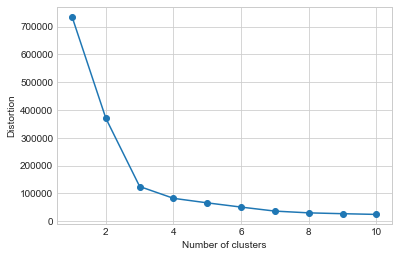

In [42]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(list_features_train)
    distortions.append(km.inertia_)
    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


## silhouette plot to test k = 3

In [49]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [50]:
kmeans = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(list_features_train)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

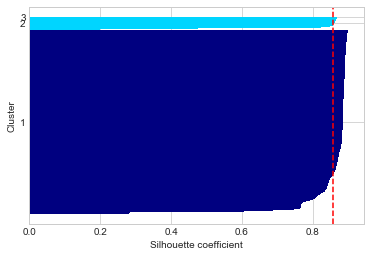

In [51]:
silhouette_vals = silhouette_samples(list_features_train, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## silhouette plot to test k = 4

In [52]:
kmeans = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(list_features_train)
labels = kmeans.labels_

cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

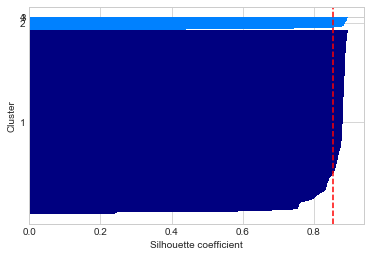

In [53]:
silhouette_vals = silhouette_samples(list_features_train, labels, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
    c_silhouette_vals,
    height=1.0,
    edgecolor='none',
    color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## Cluster lists with KMeans, k = 3

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

In [37]:
kmeans.fit(list_features_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [38]:
kmeans.predict(list_features) 

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [39]:
kmeans.cluster_centers_.shape

(3, 44)

In [40]:
print ("cluster centers:")
print (kmeans.cluster_centers_)

cluster centers:
[[  2.55815943e+00   1.47174649e+00   2.87584673e-01   1.52240848e-02
    5.38829969e-02   5.40540541e-02   1.41977420e-02   5.13171399e-03
    2.56585700e-03   5.49093397e-02   1.72767704e-02   1.53951420e-02
    1.04344851e-02   3.42114266e-04   4.96065686e-02   3.43824837e-02
    2.06979131e-02   6.67122819e-03   3.23297982e-02   1.17516250e-01
    3.25008553e-02   4.12247691e-02   1.95005132e-02   1.38556278e-02
    2.20663702e-02   2.30927130e-02   3.19876839e-02   2.80533698e-02
    1.59083134e-02   3.16455696e-02   3.42114266e-04   3.76325693e-03
    2.71980842e-02   3.42114266e-03   7.33835101e-02   1.71057133e-03
    1.23161136e-02   7.69757099e-03   1.57372562e-02   8.99760520e-02
    0.00000000e+00   5.85528567e-01   3.95997263e-01   1.84741704e-02]
 [  3.02975000e+01   9.58000000e-01   6.28075000e-01   3.25000000e-02
    4.75000000e-02   6.75000000e-02   2.75000000e-02   2.50000000e-03
    7.80625564e-18   2.50000000e-02   3.00000000e-02   1.50000000e-02
  

In [55]:
labels = kmeans.labels_
list_features_train["cluster"] = labels

/Users/Crystal/.msba-notes/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
list(list_features_train)

['minimum_nights',
 'reviews_per_month',
 'availability_365_perc',
 'neighbourhood_Bayview',
 'neighbourhood_Bernal Heights',
 'neighbourhood_Castro/Upper Market',
 'neighbourhood_Chinatown',
 'neighbourhood_Crocker Amazon',
 'neighbourhood_Diamond Heights',
 'neighbourhood_Downtown/Civic Center',
 'neighbourhood_Excelsior',
 'neighbourhood_Financial District',
 'neighbourhood_Glen Park',
 'neighbourhood_Golden Gate Park',
 'neighbourhood_Haight Ashbury',
 'neighbourhood_Inner Richmond',
 'neighbourhood_Inner Sunset',
 'neighbourhood_Lakeshore',
 'neighbourhood_Marina',
 'neighbourhood_Mission',
 'neighbourhood_Nob Hill',
 'neighbourhood_Noe Valley',
 'neighbourhood_North Beach',
 'neighbourhood_Ocean View',
 'neighbourhood_Outer Mission',
 'neighbourhood_Outer Richmond',
 'neighbourhood_Outer Sunset',
 'neighbourhood_Pacific Heights',
 'neighbourhood_Parkside',
 'neighbourhood_Potrero Hill',
 'neighbourhood_Presidio',
 'neighbourhood_Presidio Heights',
 'neighbourhood_Russian Hill',
 

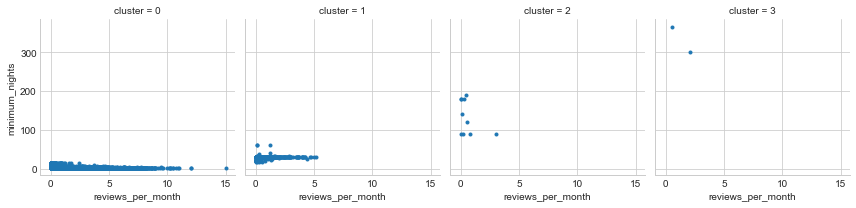

In [62]:
g = sns.FacetGrid(list_features_train, col="cluster")
g = g.map(plt.scatter, "reviews_per_month", "minimum_nights", marker=".")

### py.test plugin to validate

pass, below is the output of the validation output from my terminal: